<a href="https://colab.research.google.com/github/shalmakaisya18/TugasAnalisisRegresi/blob/main/TUGAS_AED_Pertemuan_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tugas Minggu ke-8 Analisis Eksplorasi Data**
Shalma Kaisya, G1401221105

Menggunakan data kpop 4th gen sales yang memperlihatkan artis grup kpop mana yang menunjukan penjualan terbesar.

In [ ]:
import pandas as pd

# Baca file CSV
data = pd.read_csv('Kpop 4th gen Sales - Sheet1.csv')
data=data.head(500)

data

,Artist,title,date,country,sales,peak_chart
0,IZONE,Bloom*iz,2/17/2020,KOR,492504,2
1,IZONE,Bloom*iz,2/17/2020,JPN,23960,3
2,IZONE,TWELVE,10/21/2020,JPN,135113,1
3,IZONE,Color*Iz,10/29/2018,KOR,282816,2
4,IZONE,Color*Iz,10/29/2018,JPN,"48,734",1
...,...,...,...,...,...,...
92,Everglow,Reminiscence,2/3/2020,KOR,30912,4
93,Everglow,Reminiscence,2/3/2020,JPN,1649,48
94,Everglow,-77.82X-78.29,9/21/2020,KOR,49388,4
95,Everglow,Arrival of Everglow,3/18/2019,KOR,28033,6


In [ ]:
print(data.head())


  Artist     title        date country   sales  peak_chart
0  IZONE  Bloom*iz   2/17/2020     KOR  492504           2
1  IZONE  Bloom*iz   2/17/2020     JPN   23960           3
2  IZONE    TWELVE  10/21/2020     JPN  135113           1
3  IZONE  Color*Iz  10/29/2018     KOR  282816           2
4  IZONE  Color*Iz  10/29/2018     JPN  48,734           1


In [ ]:
print(data.dtypes)


Artist        object
title         object
date          object
country       object
sales         object
peak_chart     int64
dtype: object


In [ ]:
import pandas as pd

# Mengubah tipe data 'date' menjadi datetime
data['date'] = pd.to_datetime(data['date'])

# Mengubah tipe data 'sales' menjadi int64
data['sales'] = data['sales'].str.replace(',', '').str.strip().astype('int64')

# Menampilkan informasi tentang DataFrame setelah perubahan
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Artist      97 non-null     object        
 1   title       97 non-null     object        
 2   date        97 non-null     datetime64[ns]
 3   country     97 non-null     object        
 4   sales       97 non-null     int64         
 5   peak_chart  97 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.7+ KB


In [ ]:
### memeriksa nilai nol

data.isnull().sum().sort_values(ascending=False)

Artist        0
title         0
date          0
country       0
sales         0
peak_chart    0
dtype: int64

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Artist,97,11,Stray Kids,17
title,97,66,Season 2. Hideout: The New Day We Step Into\t\r\n,4
country,97,3,KOR,59


In [ ]:
### Buat kolom baru untuk bulan, hari, dan tahun

from datetime import datetime as dt

data['month'] = data['date'].dt.month_name()
data['day'] = data['date'].dt.day_name()
data['year'] = data['date'].dt.year

data.head()


,Artist,title,date,country,sales,peak_chart,month,day,year
0,IZONE,Bloom*iz,2020-02-17,KOR,492504,2,February,Monday,2020
1,IZONE,Bloom*iz,2020-02-17,JPN,23960,3,February,Monday,2020
2,IZONE,TWELVE,2020-10-21,JPN,135113,1,October,Wednesday,2020
3,IZONE,Color*Iz,2018-10-29,KOR,282816,2,October,Monday,2018
4,IZONE,Color*Iz,2018-10-29,JPN,48734,1,October,Monday,2018


<Axes: xlabel='year', ylabel='sales'>

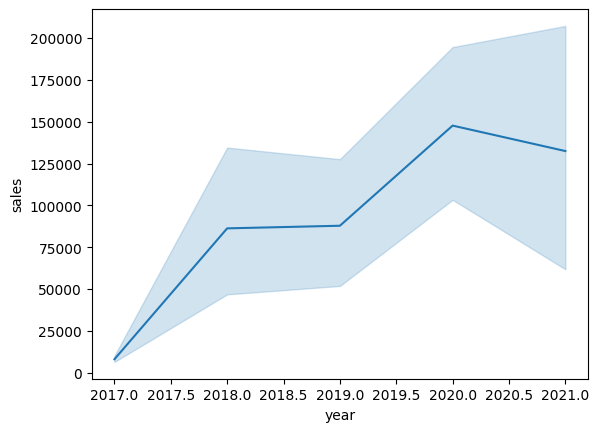

In [ ]:
sns.lineplot(data,x='year', y='sales')

Selama rentang waktu dari tahun 2017 hingga 2021, terdapat tren kenaikan yang signifikan dalam rata-rata penjualan industri K-pop generasi keempat. Data menunjukkan bahwa penjualan terus meningkat dari tahun ke tahun, mencerminkan popularitas yang terus berkembang dari musik K-pop di seluruh dunia. Hal ini menandakan bahwa K-pop generasi keempat memegang peranan penting dalam pasar musik global dan menunjukkan bahwa minat publik terhadap genre ini terus berkembang dari waktu ke waktu.

month
March        14
October      14
January      13
April        10
August       10
February      8
June          6
May           6
July          5
September     5
December      4
November      2
Name: sales, dtype: int64


<Axes: xlabel='month', ylabel='sales'>

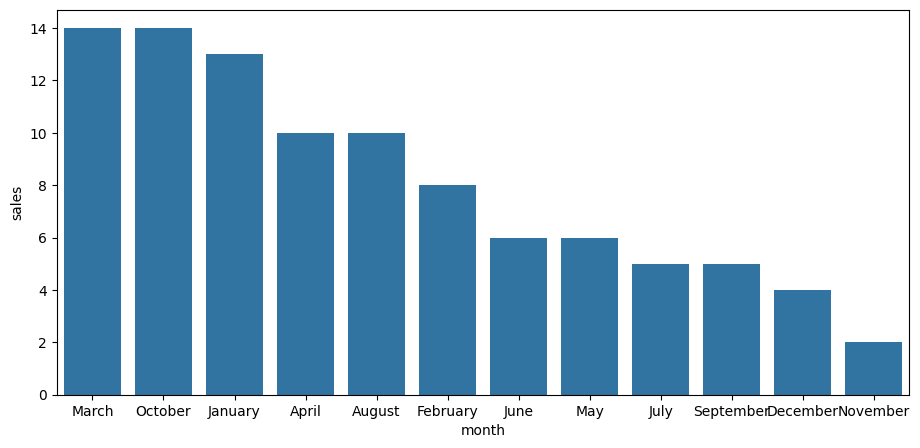

In [ ]:
print(data.groupby(['month'])['sales'].count().sort_values(ascending=False))

plt.figure(figsize=(11,5))
sns.barplot(
    data.groupby(['month'])['sales'].count().sort_values(ascending=False).reset_index(),
    x='month', y='sales')

Selama rentang waktu 2017 hingga 2021, bulan Maret, Oktober, dan Januari menonjol sebagai bulan di mana lagu-lagu K-pop mencapai puncak penjualannya. Fenomena ini menunjukkan bahwa ada tren yang konsisten dalam preferensi pendengar selama periode tersebut, dengan lagu-lagu yang dirilis pada bulan-bulan tersebut cenderung mendapatkan respons yang lebih besar dari penggemar. Hal ini menunjukkan pentingnya penempatan strategis dalam kalender perilisan lagu bagi artis dan produsen musik untuk memaksimalkan dampak dan keberhasilan lagu-lagu mereka di pasaran.

day        Friday Monday Thursday Tuesday Wednesday
Artist                                             
(G)I-dle        -    6.0        -     1.0       2.0
Ateez           -    6.0        -     2.0       6.0
Cravity       2.0      -        -     4.0         -
Everglow        -    5.0        -       -         -
ITZY            -    4.0        -       -       2.0
IZONE           -    7.0        -       -       3.0
Loona           -    3.0      2.0     2.0       2.0
Stray Kids      -   14.0        -       -       3.0
TXT             -    8.0        -       -       1.0
Treasure      3.0    2.0        -       -         -
Verivery        -      -        -     3.0       4.0


<Axes: xlabel='day', ylabel='sales'>

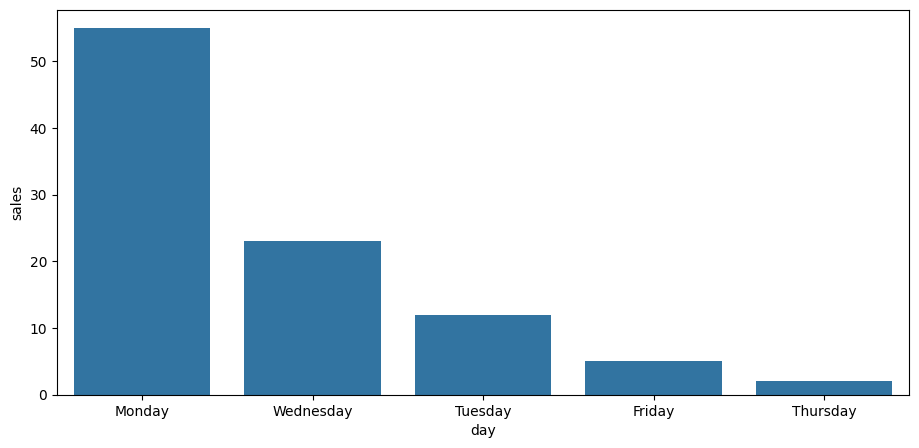

In [ ]:
print(data.pivot_table(index='Artist',
                     columns='day',
                     values='sales',
                     aggfunc='count',
                     fill_value='-'))

plt.figure(figsize=(11,5))
sns.barplot(
    data.groupby(['day'])['sales'].count().sort_values(ascending=False).reset_index(),
    x='day', y='sales')

Terdapat kecenderungan bahwa artis K-pop sering kali merilis lagu-lagu baru dan melakukan penampilan di berbagai acara pada hari Senin. Hal ini mungkin disebabkan oleh strategi pemasaran yang cermat, dengan tujuan untuk menarik perhatian penggemar di awal minggu dan menciptakan momentum yang kuat untuk karya baru mereka. Dengan demikian, Senin menjadi hari yang penting dalam kalender perilisan musik dan aktivitas promosi bagi artis K-pop.

        Artist    sales
0     (G)I-dle   787686
1        Ateez  1588505
2      Cravity   510279
3     Everglow   138621
4         ITZY   560073
5        IZONE  2356819
6        Loona   357581
7   Stray Kids  1916965
8          TXT  1692632
9     Treasure  1112672
10    Verivery   236177


<Axes: xlabel='Artist', ylabel='sales'>

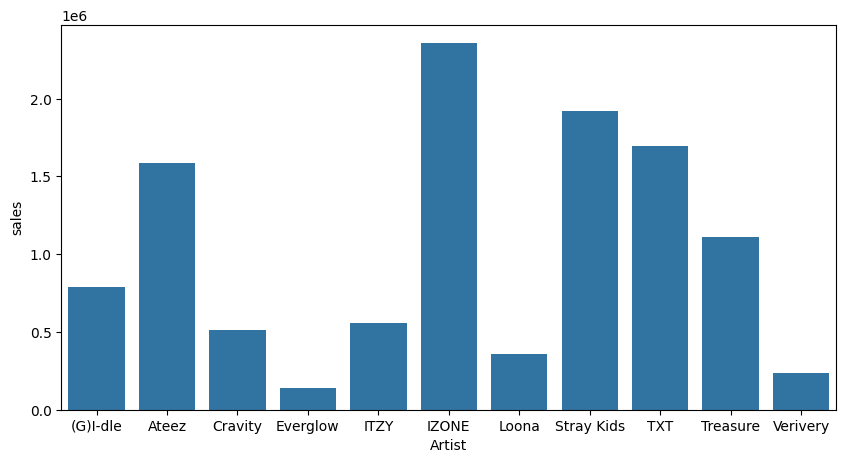

In [ ]:
print(data.groupby(['Artist'])['sales'].sum().reset_index())

plt.figure(figsize=(10,5))
sns.barplot(
    data.groupby(['Artist'])['sales'].sum().reset_index(),
    x='Artist',
    y='sales')

Selama lima tahun terakhir, dari 2017 hingga 2021, IZONE telah menjadi penguasa utama dalam industri K-pop dengan penjualan yang mendominasi. Mereka berhasil mencatat prestasi sebagai artis terlaris dalam rentang waktu tersebut, menegaskan posisi mereka sebagai salah satu kekuatan utama di dunia musik Korea. Dengan penjualan yang terus meningkat dari tahun ke tahun, IZONE telah mengukuhkan diri sebagai salah satu dari sedikit artis yang mampu mencapai kesuksesan yang luar biasa dalam industri yang kompetitif ini.

In [ ]:
print("Artis's sales through out the year")
print(data.pivot_table(index ='Artist',
                       columns='year',
                       values ='sales',
                       aggfunc ='sum',fill_value='-'))
print('='*70)
print('How many times Artists release their songs for the past 5 years')
print(data.pivot_table(index ='Artist',
                       columns='year',
                       values ='sales',
                       aggfunc ='count',fill_value='-'))



Artis's sales through out the year
year           2017      2018      2019     2020      2021
Artist                                                    
(G)I-dle          -   51831.0   59270.0   468658  207927.0
Ateez             -   85109.0  505485.0   595360  402551.0
Cravity           -         -         -   339274  171005.0
Everglow          -         -   56672.0    81949         -
ITZY              -         -  165091.0   394982         -
IZONE             -  331550.0         -  2025269         -
Loona       32059.0   79604.0   45782.0   200136         -
Stray Kids        -  659473.0  684604.0   572888         -
TXT               -         -  620228.0   970363  102041.0
Treasure          -         -         -   721460  391212.0
Verivery          -         -   58408.0   127770   49999.0
How many times Artists release their songs for the past 5 years
year       2017 2018 2019  2020 2021
Artist                              
(G)I-dle      -  1.0  2.0     5  1.0
Ateez         -  1.0  5

[Text(0.5, 1.0, 'Sales Artist by Year')]

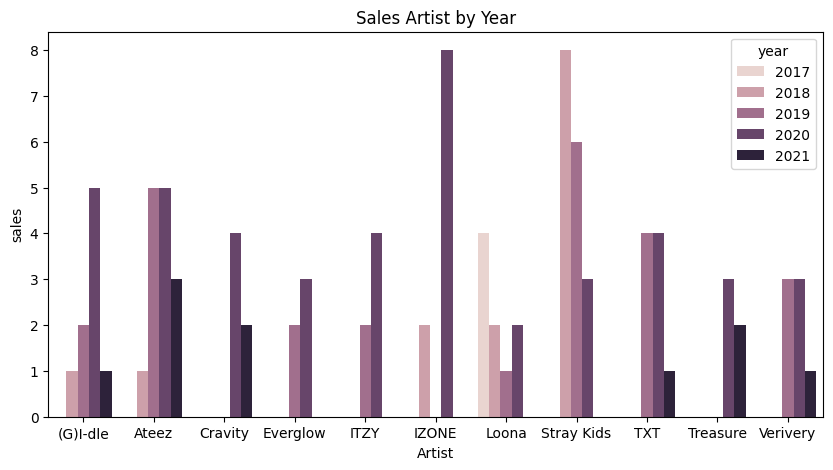

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data.groupby(['Artist', 'year'])['sales'].count().reset_index(),
    x='Artist',
    y='sales',
    hue='year').set(title='Sales Artist by Year')


[Text(0.5, 1.0, 'Sales Artist by Year')]

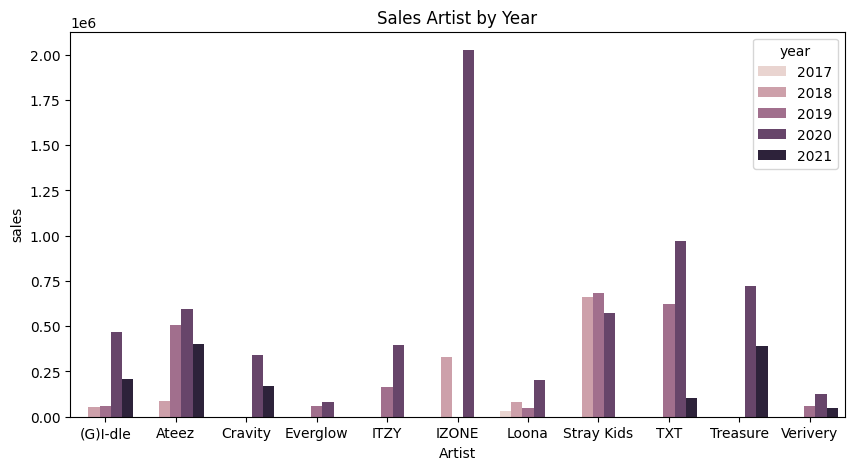

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data.groupby(['Artist', 'year'])['sales'].sum().reset_index(),
    x='Artist',
    y='sales',
    hue='year').set(title='Sales Artist by Year')


KESIMPULAN:
Rata-rata penjualan K-pop generasi ke-4 menunjukkan kecenderungan peningkatan yang stabil dari tahun 2017 hingga 2021, mencerminkan daya tarik yang terus berkembang dari genre musik ini di pasar global. Selama rentang waktu ini, bulan Maret, Oktober, dan Januari mencatat penjualan paling tinggi, sementara mayoritas perilisan lagu terjadi pada hari Senin. Fenomena ini menunjukkan pola konsumsi yang konsisten dan kemungkinan besar terkait dengan strategi pemasaran yang dipilih oleh pelaku industri.

IZONE secara konsisten menonjol sebagai artis terlaris dalam industri K-pop selama periode 2017 hingga 2021. Puncak penjualan mereka terjadi pada tahun 2020, menandai dominasi mereka dalam pasar musik. Meskipun begitu, hal ini tidak mengurangi kompetisi yang ketat di antara artis lainnya. Selain IZONE, ada sejumlah artis lain yang menghasilkan lagu-lagu dengan penjualan yang bersaing, menunjukkan keberagaman dan dinamika dalam industri K-pop.

Tren pertumbuhan yang konsisten dalam rata-rata penjualan K-pop generasi ke-4 dari tahun 2017 hingga 2021 menunjukkan kekuatan yang berkelanjutan dari genre musik ini. Dukungan konsumen yang kuat, strategi pemasaran yang efektif, dan keberhasilan artis-artis terkemuka seperti IZONE telah mendorong pertumbuhan dan keberlanjutan industri K-pop dalam skala global.
